In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from tensorflow.keras.applications import InceptionV3
from keras.models import Model
from keras.layers import Dense,Flatten,Dropout,GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt 
from glob import glob 
from PIL import Image 
import os 
import warnings 
warnings.filterwarnings("ignore",category=FutureWarning)

In [2]:
IMAGE_SIZE=[299,299]

In [3]:
train_path="/kaggle/input/brain-tumor-mri-dataset/Training"
test_path="/kaggle/input/brain-tumor-mri-dataset/Testing"

In [4]:
class_folders=[f for f in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, f))]


In [5]:
print(class_folders)

['pituitary', 'notumor', 'meningioma', 'glioma']


Showing images from class: pituitary


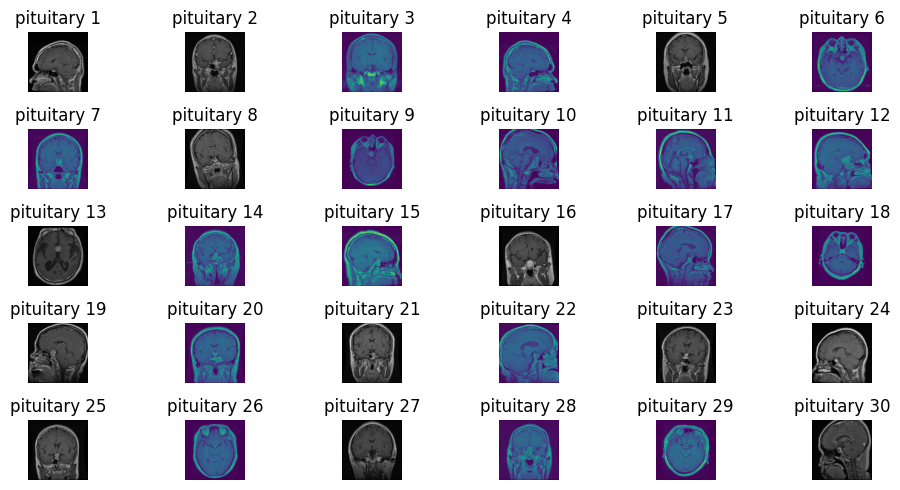

Showing images from class: notumor


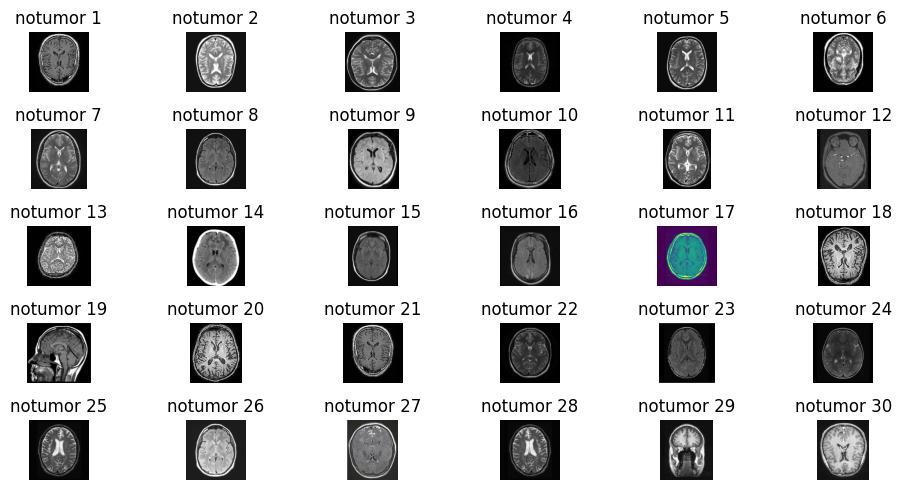

Showing images from class: meningioma


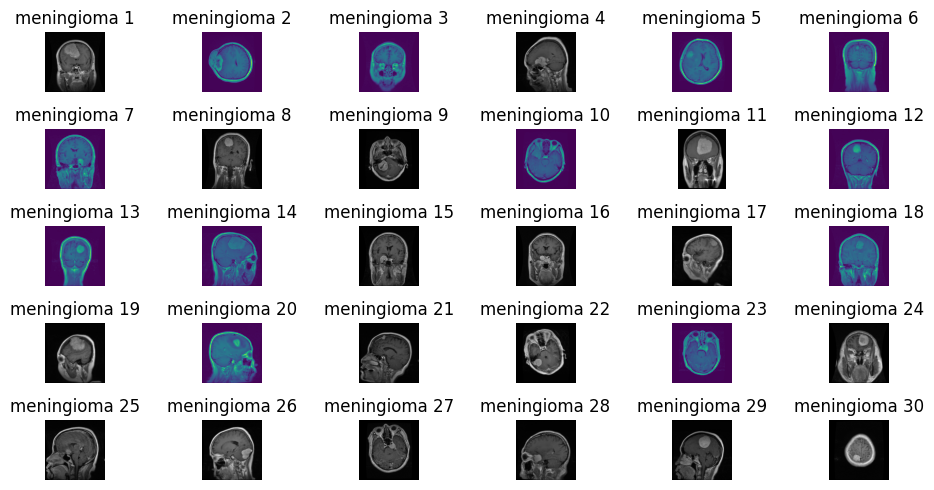

Showing images from class: glioma


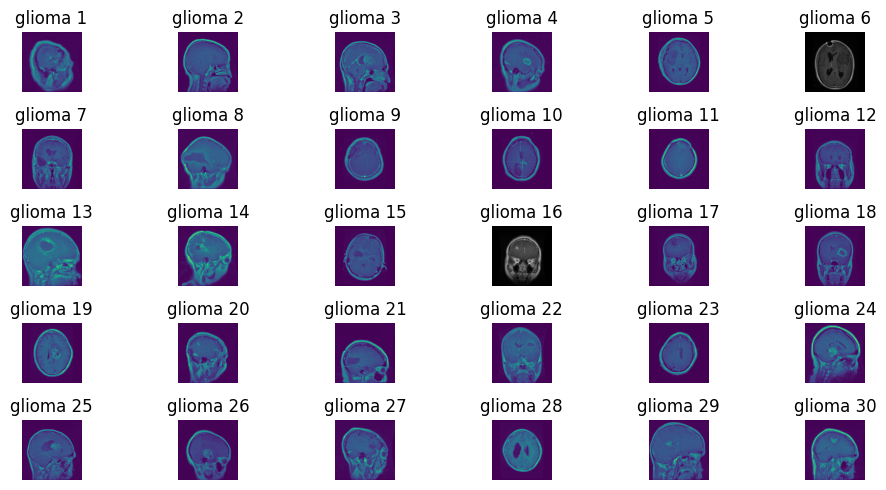

In [6]:
for class_folder in class_folders:
    class_folder_path=os.path.join(train_path,class_folder)
    image_files=os.listdir(class_folder_path)[:30]
    print(f"Showing images from class: {class_folder}")
    
    plt.figure(figsize=(10,5))
    
    for i,image_file in enumerate(image_files):
        image_path=os.path.join(class_folder_path,image_file)
        img=Image.open(image_path)
        
        plt.subplot(5,6,i+1)
        plt.imshow(img)
        plt.title(f"{class_folder} {i+1}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


In [7]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                rotation_range=45,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest',
                                preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)
test_datagen=ImageDataGenerator(
    rescale=1./255,  # Normalizes the image pixel values
    preprocessing_function=tf.keras.applications.inception_v3.preprocess_input
)

In [15]:
train_generator=train_datagen.flow_from_directory(train_path,
                                                 target_size=IMAGE_SIZE,
                                                 batch_size=16,
                                                 class_mode='categorical')
test_generator=test_datagen.flow_from_directory(test_path,
                                                target_size=IMAGE_SIZE,
                                                batch_size=16,
                                                class_mode='categorical')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [9]:
base_model=InceptionV3(weights='imagenet',include_top=False,input_shape=(299,299,3))
base_model.trainable=False

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [14]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=BatchNormalization()(x)
x=Dropout(0.5)(x)
x=Dense(128,activation='relu')(x)
x=Dense(128,activation='relu')(x)
x=Dense(128,activation='relu')(x)
x=BatchNormalization()(x)
x=Dropout(0.5)(x)
outputs=Dense(4,activation='softmax')(x)
model=Model(inputs=base_model.input,outputs=outputs)
model.compile(optimizer=SGD(learning_rate=0.1, momentum=0.8, decay=0.1/0.8),
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 22,107,300 (84.33 MB)

 Trainable params: 300,164 (1.15 MB)

 Non-trainable params: 21,807,136 (83.19 MB)

In [11]:
#setting up callbacks 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping=EarlyStopping(monitor='val_loss',
                            patience=5,
                            restore_best_weights=True)
model_checkpoint=ModelCheckpoint('brain_tumor.keras',
                                monitor='val_accuracy',
                                save_best_only=True,
                                mode='max')

In [16]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)


In [17]:
history=model.fit(train_generator,
                 epochs=10,
                 batch_size=16,
                 verbose=1,
                 validation_data=test_generator,
                 callbacks=[early_stopping,model_checkpoint,lr_schedule])

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1727540813.149096     115 service.cc:145] XLA service 0x7e30a4004480 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727540813.149176     115 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  1/357 ━━━━━━━━━━━━━━━━━━━━ 2:17:18 23s/step - accuracy: 0.3125 - loss: 1.9037

I0000 00:00:1727540824.235132     115 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


357/357 ━━━━━━━━━━━━━━━━━━━━ 203s 505ms/step - accuracy: 0.4283 - loss: 1.5133 - val_accuracy: 0.4653 - val_loss: 1.2091 - learning_rate: 0.1000
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 145s 397ms/step - accuracy: 0.5177 - loss: 1.0837 - val_accuracy: 0.5507 - val_loss: 1.0166 - learning_rate: 0.1000
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 144s 395ms/step - accuracy: 0.5688 - loss: 1.0276 - val_accuracy: 0.6453 - val_loss: 0.8663 - learning_rate: 0.1000
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 201s 393ms/step - accuracy: 0.5838 - loss: 0.9874 - val_accuracy: 0.6217 - val_loss: 0.9130 - learning_rate: 0.1000
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 143s 392ms/step - accuracy: 0.5905 - loss: 0.9682 - val_accuracy: 0.6445 - val_loss: 0.9902 - learning_rate: 0.1000
Epoch 6/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 142s 390ms/step - accuracy: 0.6274 - loss: 0.8981 - val_accuracy: 0.6613 - val_loss: 0.8491 - learning_rate: 0.0500
Epoch 7/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 144s 395ms/step - accuracy: 0.6262 

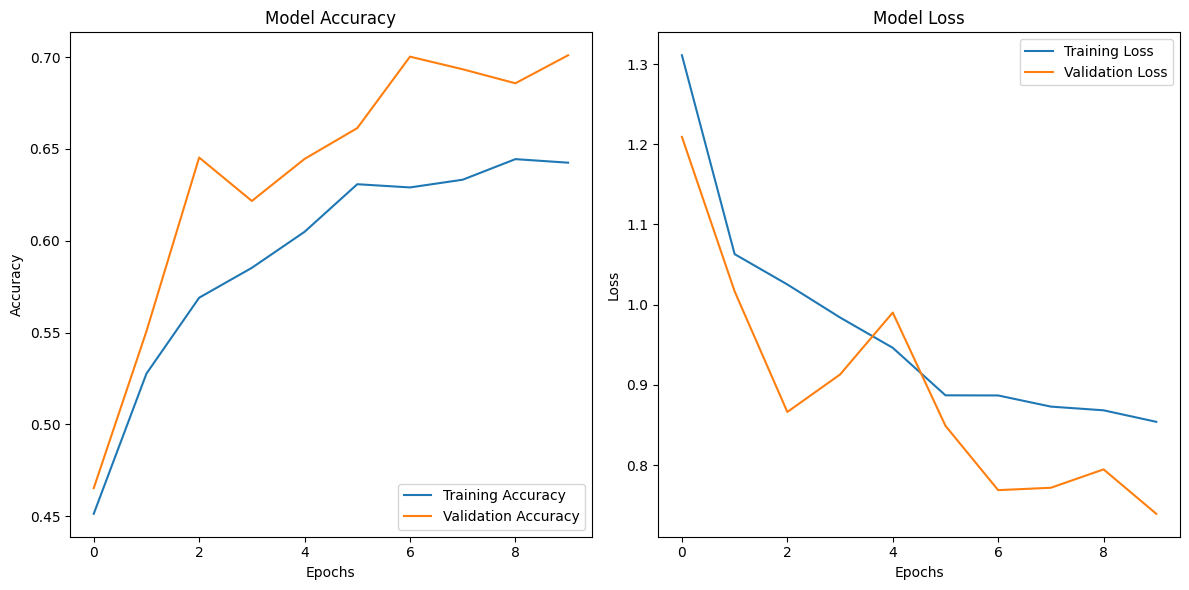

In [18]:
 plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [20]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

# Print the results
print(f"Test Loss: {test_loss*100.0}")
print(f"Test Accuracy: {test_accuracy*100.0}")


82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.7055 - loss: 0.7260
Test Loss: 73.93847107887268
Test Accuracy: 70.09916305541992


In [21]:
# Predict class probabilities for the test data
predictions = model.predict(test_generator)

# If the output is a probability distribution, you can convert it to predicted class labels
predicted_classes = np.argmax(predictions, axis=1)

# True labels from the test data
true_labels = test_generator.classes

# Print some example predictions
print(f"Predicted classes: {predicted_classes[:10]}")
print(f"True classes: {true_labels[:10]}")


82/82 ━━━━━━━━━━━━━━━━━━━━ 14s 106ms/step
Predicted classes: [2 2 3 3 2 0 2 1 3 1]
True classes: [0 0 0 0 0 0 0 0 0 0]


82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step


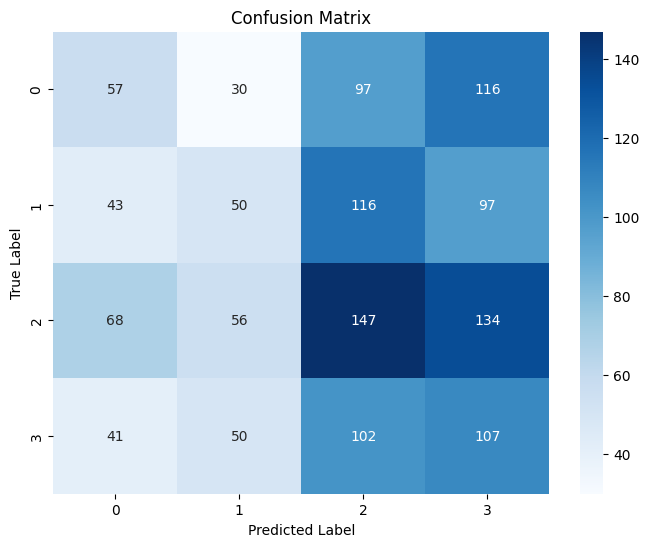

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get predictions and true labels
predicted_classes = np.argmax(model.predict(test_generator), axis=1)
true_labels = test_generator.classes

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()